In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.collections import LineCollection

In [309]:
phi_poly = 0.30 # packing fraction
phi_part = 0.20

L = 50    # box length
n_part_poly = int(phi_poly*L*L/np.pi)   # number of particles in polymers
n_part = int(phi_part*L*L/np.pi)        # number of free(gel) particles 

tot_n_part = n_part_poly + n_part
print(f"n_part_poly{n_part_poly}")

list_pos_x = np.empty((tot_n_part,))*np.nan        # containers for 
list_pos_y = np.empty((tot_n_part,))*np.nan        # x and y positions of particles

list_nx = np.empty((tot_n_part,))*np.nan        # containers for directors  
list_ny = np.empty((tot_n_part,))*np.nan        # nx and ny 

radius = 1.0                  # radius of particles (currently monodisperse)

avg_length_poly = 5           # random polymer lengths [at least 3 for angles to work]
eq_dis = 2*radius

n_poly = int(n_part_poly/avg_length_poly)
print(f"n_poly={n_poly}")

list_polymers_pos = []        # container for all polymers (particle position), here first index for list becomes ids(labels) for polymer
list_poly_part_id = []        # container for all particles within the polymers, increasing order of particle id corelates with increasing ids of polymers 
list_bonds = []               # container for bonds which stores the positions of pairs in [(x1,y1), (x2,y2)]
list_bond_ids = []            # container to store and label the bonds between pairs
list_angles = []              # container for all angles (each contains particle triplets positions)
list_angles_ids = []          # container for angle ids [corelates with increasing order of polymers and particle ids]
part_ids = []                 # container for particle ids
molecules = []                # contianer for molecule ids 
cnt_poly = 0
cnt_free_part = 0
cnt = 0

while(cnt_poly < n_poly):

    # curr_poly_len = np.random.normal(avg_length_poly, 2)

    new_poly = []         # container for postions of particles in the polymer created in this loop
    new_poly_part_id = [] # container to store the particle ids of polymers

    x,y = np.random.rand(2)*L                  # initialising a single particle randomly inside a box of length L
    overlap = False
    
    for ii in range(0, cnt):
        r_sq = (x - list_pos_x[ii])**2 + (y - list_pos_y[ii])**2
        
        if(r_sq <= 2*radius**2):
            overlap = True
            break

    if overlap:
        continue

    list_pos_x[cnt] = x                        # if passes the checks 
    list_pos_y[cnt] = y                        # particle is assigned inside the box

    theta = np.random.rand()*np.pi
    list_nx[cnt]= np.cos(theta)
    list_ny[cnt]= np.sin(theta)

    new_poly.append([x,y])
    new_poly_part_id.append(cnt)
    molecules.append(cnt_poly)
    part_ids.append(cnt)

    cnt += 1
    curr_dummy_cnt = 1
    
    while(curr_dummy_cnt <= avg_length_poly):

        theta = np.random.rand()*np.pi
        x_new = x + eq_dis*np.cos(theta)
        y_new = y + eq_dis*np.sin(theta)

        overlap = False
    
        for ii in range(0, cnt):
            r_sq = (x_new - list_pos_x[ii])**2 + (y_new - list_pos_y[ii])**2
            
            if(r_sq <= 2*radius**2):
                overlap = True
                break

        if overlap:
           continue

        if(x_new//L != 0 or y_new//L !=0 ):   # check if particle outside box
            while(curr_dummy_cnt > 0):
                list_pos_x[cnt]= np.nan
                list_pos_y[cnt]= np.nan
                list_nx[cnt] = np.nan
                list_ny[cnt] = np.nan  
                molecules.pop()
                part_ids.pop()
                cnt-=1
                curr_dummy_cnt -=1
                #cnt_poly=-1
            #list_pos_x[cnt-1]= np.nan
            #list_pos_y[cnt-1]= np.nan
            new_poly = []
            new_poly_part_id = []
            break

        if(curr_dummy_cnt >= 2):
            list_bonds.append([[x,y], [x_new,y_new]])
            list_bond_ids.append([cnt-1,cnt])
            
            n_curr = [x_new-x, y_new -y] # calculating the vector along the bond
            n_curr = n_curr/np.linalg.norm(n_curr) # to get the director for particle 1 -> 2 -> 3 -> (4) last one we need to assign  
            list_nx[cnt-1] = n_curr[0]
            list_ny[cnt-1] = n_curr[1]

            if(curr_dummy_cnt == avg_length_poly):
                list_nx[cnt] = list_nx[cnt-1]
                list_ny[cnt] = list_ny[cnt-1]
                
        if(curr_dummy_cnt >= 3):
            list_angles.append([cnt-2,cnt-1,cnt])
        
        x,y = x_new, y_new
        
        new_poly.append([x_new,y_new])
        
        list_pos_x[cnt] = x                        # if passes the checks 
        list_pos_y[cnt] = y                        # particle is assigned inside the box

        molecules.append(cnt_poly)
        part_ids.append(cnt)

        print(f"cnt = {cnt}") 
        cnt +=1
        curr_dummy_cnt +=1

    print(f"cnt = {cnt}") 
    print(f"cnt_poly = {cnt_poly}")
    list_polymers_pos.append(new_poly)
    list_poly_part_id.append(new_poly_part_id)
    cnt_poly +=1

while(cnt < tot_n_part):

    x,y = np.random.rand(2)*L                  # initialising a single particle randomly inside a box of length L
    overlap = False
    
    for ii in range(0, cnt):
        r_sq = (x - list_pos_x[ii])**2 + (y - list_pos_y[ii])**2

        if(r_sq <= 3*radius**2):
            overlap = True
            break

    if overlap:
        continue

    list_pos_x[cnt] = x                        # if passes the checks 
    list_pos_y[cnt] = y                        # particle is assigned inside the box

    theta_cur = np.random.rand()*2*np.pi
    list_nx[cnt] = np.cos(theta_cur)
    list_ny[cnt] = np.sin(theta_cur)
    
    #print(f"cnt = {cnt}")
    part_ids.append(cnt)
    molecules.append(cnt_poly)
    cnt_poly+=1
    cnt+=1

print(f"cnt = {cnt}")

n_part_poly238
n_poly=47
cnt = 1
cnt = 2
cnt = 3
cnt = 4
cnt = 5
cnt = 6
cnt_poly = 0
cnt = 7
cnt = 8
cnt = 9
cnt = 10
cnt = 11
cnt = 12
cnt_poly = 1
cnt = 13
cnt = 14
cnt = 15
cnt = 16
cnt = 17
cnt = 18
cnt_poly = 2
cnt = 19
cnt = 20
cnt = 21
cnt = 22
cnt = 23
cnt = 24
cnt_poly = 3
cnt = 25
cnt = 24
cnt_poly = 4
cnt = 25
cnt = 26
cnt = 27
cnt = 28
cnt = 29
cnt = 30
cnt_poly = 5
cnt = 30
cnt_poly = 6
cnt = 31
cnt = 32
cnt = 33
cnt = 34
cnt = 35
cnt = 36
cnt_poly = 7
cnt = 37
cnt = 38
cnt = 39
cnt = 40
cnt = 41
cnt = 42
cnt_poly = 8
cnt = 43
cnt = 44
cnt = 45
cnt = 46
cnt = 47
cnt = 48
cnt_poly = 9
cnt = 49
cnt = 50
cnt = 51
cnt = 52
cnt = 53
cnt = 54
cnt_poly = 10
cnt = 55
cnt = 56
cnt = 57
cnt = 58
cnt = 59
cnt = 60
cnt_poly = 11
cnt = 61
cnt = 62
cnt = 63
cnt = 64
cnt = 65
cnt = 66
cnt_poly = 12
cnt = 67
cnt = 68
cnt = 69
cnt = 70
cnt = 71
cnt = 72
cnt_poly = 13
cnt = 72
cnt_poly = 14
cnt = 73
cnt = 74
cnt = 75
cnt = 76
cnt = 77
cnt = 78
cnt_poly = 15
cnt = 79
cnt = 80
cnt = 81
cnt =

In [312]:
print(np.asarray(list_pos_x))

[2.19095750e+01 2.38143404e+01 2.48802444e+01 2.65430182e+01
 2.54522490e+01 2.38922282e+01 2.85443124e+01 2.99939207e+01
 3.13337404e+01 3.02497068e+01 3.14168188e+01 2.94961749e+01
 4.26887875e+01 4.46826369e+01 4.36675640e+01 4.26327237e+01
 4.19017780e+01 3.99393366e+01 9.42474232e+00 7.91979858e+00
 8.91628532e+00 6.91943379e+00 6.12758806e+00 6.18445390e+00
 2.84680681e+01 2.88965740e+01 3.02743556e+01 3.14665659e+01
 3.17955272e+01 3.37927958e+01 1.78154612e+01 1.72454196e+01
 1.90249316e+01 1.83262498e+01 1.99657342e+01 2.10705012e+01
 2.19460762e+01 2.37545687e+01 2.56273505e+01 2.66135282e+01
 2.81712638e+01 2.93837364e+01 1.14573147e+01 1.03211328e+01
 1.11834186e+01 9.60057023e+00 1.13006873e+01 1.14403086e+01
 3.39083514e+01 3.48877570e+01 3.58562044e+01 3.59673903e+01
 3.54954884e+01 3.54415944e+01 2.78346487e+01 2.70702789e+01
 2.85951930e+01 3.05494516e+01 3.25362939e+01 3.43958439e+01
 1.27326318e+01 1.15438576e+01 1.02021320e+01 8.46428358e+00
 7.48875706e+00 6.772852

In [162]:
print(np.array(list_bond_ids).shape)

(182, 2)


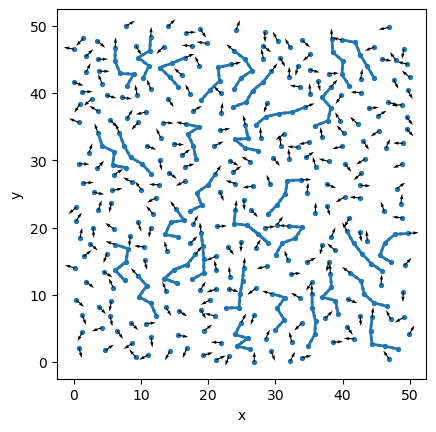

In [310]:
list_pos = np.column_stack((list_pos_x,list_pos_y))

segments = [(list_pos[i], list_pos[j]) for (i, j) in list_bond_ids]
seg_arr = np.array(segments, dtype=float)

fig, ax = plt.subplots()

# Plot bonds
lc = LineCollection(seg_arr, linewidths=2)
ax.add_collection(lc)

# Plot nodes (optional)
ax.scatter(list_pos_x[:], list_pos_y[:], s=8)
plt.quiver(list_pos_x[:], list_pos_y[:],list_nx[:],list_ny[:])

ax.autoscale()
ax.set_aspect("equal", adjustable="box")
ax.set_xlabel("x")
ax.set_ylabel("y")

plt.savefig("mixed_polymer_and_gel.png", dpi = 300, format = "png")
plt.savefig("mixed_polymer_and_gel.svg", dpi = 300, format = "svg")
plt.show()


In [239]:
print(np.asarray(list_angles).shape)

(108, 3)


In [165]:
part_ids = np.asarray(part_ids)
molecules_id = np.asarray(molecules)
types = np.ones(len(list_pos_x))

In [325]:
assert(len(part_ids)== len(molecules_id) )
assert(len(part_ids)== len(types))

AssertionError: 

In [326]:
print(len(part_ids))
print(len(molecules_id))
print(len(types))
print(len(list_pos_x))
print(len(list_nx))

397
437
437
397
397


In [314]:
def write_filaments_input(filename, ids, molecules, types, x, y, nx, ny,):
    # Convert everything to 1D numpy arrays
    cols = [
        np.asarray(ids).ravel(),
        np.asarray(molecules).ravel(),
        np.asarray(types).ravel(),
        np.asarray(x).ravel(),
        np.asarray(y).ravel(),
        np.asarray(nx).ravel(),
        np.asarray(ny).ravel(),]

    n = len(cols[0])
    if any(len(c) != n for c in cols):
        raise ValueError("All columns must have the same length.")

    data = np.column_stack(cols)

    header = "keys: id  molecule type  x  y  nx  ny"

    # Match the style you showed: integers for first 3 cols, floats for the rest
    fmt = ["%d", "%d", "%d", "%.6f", "%.6f", "%.6f", "%.6f"]

    with open(filename, "w", newline="\n") as f:
        f.write(header + "\n")
        np.savetxt(f, data, fmt=fmt, delimiter="  ")  # delimiter is just spacing

# Example usage:
# write_filaments_input("filaments_new.input", ids, molecules, types, x, y, nx, ny)

In [315]:
def write_bonds_input(filename, bond_ids, bond_types, bonds):
    # Convert everything to 1D numpy arrays
    bonds = np.asarray(bonds)
    pair_1 = np.asarray([b[0] for b in bonds])
    pair_2 = np.asarray([b[1] for b in bonds])
    cols = [
        np.asarray(bond_ids).ravel(),
        np.asarray(bond_types).ravel(),
        np.asarray(pair_1).ravel(),
        np.asarray(pair_2).ravel()]

    n = len(cols[0])
    print(n)
    if any(len(c) != n for c in cols):
        raise ValueError("All columns must have the same length.")

    data = np.column_stack(cols)

    #header = "keys: id  molecule type  x  y  nx  ny"

    # Match the style you showed: 4 integers in a row
    fmt = ["%d", "%d", "%d" , "%d"]

    with open(filename, "w", newline="\n") as f:
        #f.write(header + "\n")
        np.savetxt(f, data, fmt=fmt, delimiter="  ")  # delimiter is just spacing

In [316]:
def write_angles_input(filename, angles, angle_types):
    # Convert everything to 1D numpy arrays
    angle_ids = range(0,np.shape(angles)[0])
    angles = np.asarray(angles)
    #part_1 = np.asarray([b[0] for b in angles])
    #part_2 = np.asarray([b[1] for b in angles])
    #part_3 = np.asarray([b[2] for b in angles])
    cols = [
        np.asarray(angle_ids).ravel(),
        np.asarray(angle_types).ravel(),
        np.asarray(angles[:,0]).ravel(),
        np.asarray(angles[:,1]).ravel(),
        np.asarray(angles[:,1]).ravel()]

    n = len(cols[0])
    print(n)
    if any(len(c) != n for c in cols):
        raise ValueError("All columns must have the same length.")

    data = np.column_stack(cols)

    #header = "keys: id  molecule type  x  y  nx  ny"

    # Match the style you showed: 5 integers in a row
    fmt = ["%d", "%d", "%d" , "%d", "%d"]

    with open(filename, "w", newline="\n") as f:
        #f.write(header + "\n")
        np.savetxt(f, data, fmt=fmt, delimiter="  ")  # delimiter is just spacing

In [317]:
write_filaments_input("filament.input", part_ids, molecules_id, types, list_pos_x, list_pos_y, list_nx, list_ny)

ValueError: All columns must have the same length.

In [318]:
bond_ids = range(np.shape(list_bond_ids)[0])
bond_types = np.ones(np.shape(list_bond_ids)[0])
write_bonds_input("filabent.bonds", bond_ids, bond_types, list_bond_ids)


137


In [319]:
angle_types = np.ones(np.shape(list_angles)[0])
write_angles_input("filament.angles", list_angles, angle_types)

100


In [320]:
np.isnan(list_nx) 

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,